In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabla = pd.read_excel(r'C:\Users\pamec\Desktop\ProyectoAD\Datos.xlsx')

In [3]:
tabla

,id,Titulo,NumAutores,Nombre,Genero,Ano,Numero,Volumen,PalabrasClave
0,1,El corporativismo sindical y sus transformaciones,1,Armando Rendón Corona,M,2001,59,18,"movimiento obrero, sindicalismo, organización ..."
1,2,El movimiento obrero mexicano después de Fidel...,1,James G. Samstad,M,2001,59,18,"México después de 1994, democratización, movim..."
2,3,Sindicalismo y ciencias sociales,1,Sergio G. Sánchez Díaz,M,2001,59,18,"México, movimiento obrero, sindicalismo, corpo..."
3,4,Experiencias organizativas en la industria maq...,1,Cirila Quintero Ramírez,F,2001,59,18,"Frontera Norte de México, organización laboral..."
4,5,El Tratado de Libre Comercio de América del No...,1,Sylvia Narváez,F,2001,59,18,TLC (Tratado de Libre Comercio de América del ...
...,...,...,...,...,...,...,...,...,...
258,259,La evaluación de los aprendizajes en educación...,1,Roxili Nairobi Meneses Ramírez,F,2024,97,35,"enfoque intercultural, evaluación de aprendiza..."
259,260,Reflexiones sobre la conformación de saberes d...,1,Noemí Cabrera Morales,F,2024,97,35,"formación docente, saberes docentes, experienc..."
260,261,Aportes en clave antropológica en torno a la i...,2,"Soledad Aliata, Ana Carolina Hecht","F, F",2024,97,35,"interculturalidad, bilingüismo, educación, ind..."
261,262,"Reflexiones sobre el territorio, la educación ...",2,"Laura Macarena Cortez, Noelia Enriz","F, F",2024,97,35,"extensión universitaria, perspectivas infantil..."


In [7]:
print("Nombres de las columnas originales:")
print(tabla.columns)

Nombres de las columnas originales:
Index(['id', 'Titulo ', 'NumAutores', 'Nombre ', 'Genero', 'Ano', 'Numero',
       'Volumen', 'PalabrasClave'],
      dtype='object')


In [9]:
tabla.columns = tabla.columns.str.strip()

In [11]:
print("\ntabla con nombres de columnas limpios:")
print(tabla)


tabla con nombres de columnas limpios:
      id                                             Titulo  NumAutores  \
0      1  El corporativismo sindical y sus transformaciones           1   
1      2  El movimiento obrero mexicano después de Fidel...           1   
2      3                   Sindicalismo y ciencias sociales           1   
3      4  Experiencias organizativas en la industria maq...           1   
4      5  El Tratado de Libre Comercio de América del No...           1   
..   ...                                                ...         ...   
258  259  La evaluación de los aprendizajes en educación...           1   
259  260  Reflexiones sobre la conformación de saberes d...           1   
260  261  Aportes en clave antropológica en torno a la i...           2   
261  262  Reflexiones sobre el territorio, la educación ...           2   
262  263  Lo "no documentado" de la sexualidad en el aul...           2   

                                             Nombre Genero 

In [29]:
articulos_por_año = tabla.groupby("Ano").size()

print("Número de artículos publicados por año:")
print(articulos_por_año)

Número de artículos publicados por año:
Ano
2001     7
2002    15
2003    16
2005    15
2006     7
2007     6
2008    12
2009    13
2010    12
2011    12
2012    15
2013    14
2014    16
2015    14
2016    13
2017    13
2018    12
2020    16
2021     6
2022    14
2023     8
2024     7
dtype: int64


In [14]:
def calcular_estadisticas(tabla, columna):
    media = tabla[columna].mean()
    mediana = tabla[columna].median()
    desviacion_estandar = tabla[columna].std()
    return media, mediana, desviacion_estandar

In [16]:
columna_analisis = 'NumAutores'
media, mediana, desviacion_estandar = calcular_estadisticas(tabla, columna_analisis)
media, mediana, desviacion_estandar

(1.193916349809886, 1.0, 0.5766124624973303)

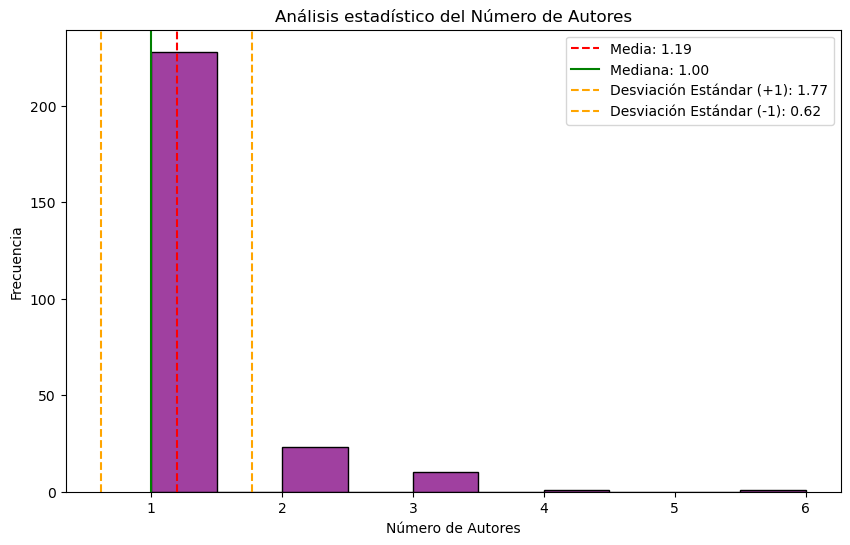

In [44]:
plt.figure(figsize=(10, 6))

sns.histplot(tabla['NumAutores'], bins=10, kde=False, color='purple')

plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.axvline(media + desviacion_estandar, color='orange', linestyle='--', label=f'Desviación Estándar (+1): {media + desviacion_estandar:.2f}')
plt.axvline(media - desviacion_estandar, color='orange', linestyle='--', label=f'Desviación Estándar (-1): {media - desviacion_estandar:.2f}')

plt.title('Análisis estadístico del Número de Autores')
plt.xlabel('Número de Autores')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

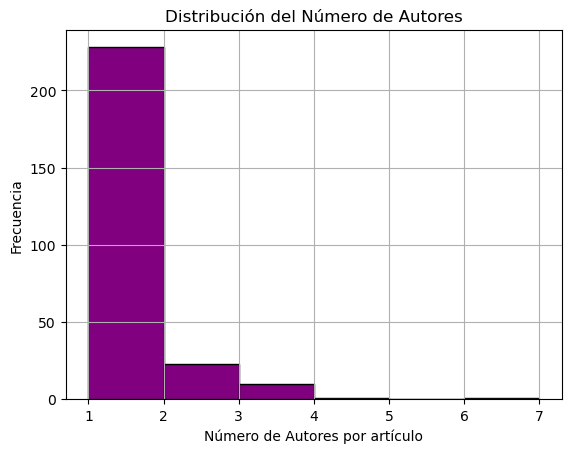

In [28]:
tabla['NumAutores'].hist(bins=range(1, int(tabla['NumAutores'].max()) + 2), edgecolor='black', color='purple')
plt.title('Distribución del Número de Autores')
plt.xlabel('Número de Autores por artículo')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
palabra_clave = input("Introduce una palabra clave: ").lower()

# Filtrar los artículos que contienen la palabra clave
articulos_filtrados = tabla[tabla["PalabrasClave"].str.lower().str.contains(palabra_clave, na=False)]

# Contar la palabra clave en los artículos
conteo_palabra_clave = articulos_filtrados.shape[0]

# Imprimir el conteo y los títulos de los artículos
print(f"La palabra clave '{palabra_clave}' aparece en {conteo_palabra_clave} artículos.")
print("Títulos de los artículos:")
for titulo in articulos_filtrados["Titulo"]:
    print(f"- {titulo}")

Introduce una palabra clave:  global


La palabra clave 'global' aparece en 6 artículos.
Títulos de los artículos:
- Producción simbólica y producción material: metáfora y conceptos en torno a la cultura del trabajo
- Agua, tecnología y sociedad en la cuenca Lerma-Chapala. Una historia regional global
- Flujos y mudanzas globales del ámbar de Chiapas, México
- Writers, taggers, graffers y crews. Identidades juveniles en torno al grafiteo
- La participación de las grandes cadenas de supermercados en las redes de comercialización de los pequeños productores
- Los mundos imaginados de la precariedad global: la prisión en la ciudad de México


In [47]:
from collections import Counter

In [49]:
todas_las_palabras_clave = tabla["PalabrasClave"].str.lower().str.cat(sep=', ')

# Dividir las palabras clave en palabras individuales
lista_palabras_clave = todas_las_palabras_clave.split(', ')

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(lista_palabras_clave)

# Obtener las palabras más comunes
palabras_mas_comunes = frecuencia_palabras.most_common(10)  # Cambiar el número para más o menos palabras

# Mostrar las palabras más comunes
print("Palabras clave más comunes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"{palabra}: {frecuencia}")

Palabras clave más comunes:
género: 14
identidad: 11
cultura: 8
sindicalismo: 7
méxico: 6
pueblos indígenas: 6
masculinidad: 5
autonomía: 5
cuerpo: 5
trabajo: 4


In [55]:
from wordcloud import WordCloud

In [77]:
todas_las_palabras_clave = tabla["PalabrasClave"].str.lower().str.cat(sep=', ')

todas_las_palabras_clave = todas_las_palabras_clave.replace('\n', ' ').replace('\r', ' ').replace(',', ' ')

lista_palabras_clave = todas_las_palabras_clave.split()

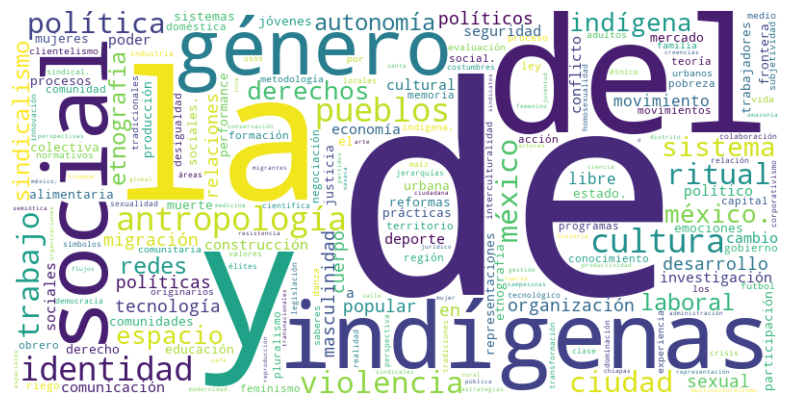

In [79]:
frecuencia_palabras = Counter(lista_palabras_clave)

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.show()

In [81]:
import string

In [107]:
stopwords = set([
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 
    'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 
    'o', 'fue', 'este', 'ha', 'sí', 'porque', 'esta', 'son', 'entre', 'cuando', 'muy', 
    'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'han', 'quien', 'están', 
    'estado', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 
    'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 
    'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 
    'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 
    'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 
    'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 
    'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 
    'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 
    'están', 'esté', 'estés', 'estemos', 'estéis', 'estén', 'estaré', 'estarás', 'estará', 
    'estaremos', 'estaréis', 'estarán', 'estaría', 'estarías', 'estaríamos', 'estaríais', 
    'estarían', 'estaba', 'estabas', 'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste', 
    'estuvo', 'estuvimos', 'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras', 'estuviéramos', 
    'estuvierais', 'estuvieran', 'estuviese', 'estuvieses', 'estuviésemos', 'estuvieseis', 
    'estuviesen', 'estando', 'estado', 'estada', 'estados', 'estadas', 'estad', 'México', 'social', 'antropología', 'méxico', 'indígena', 'cultura'
])


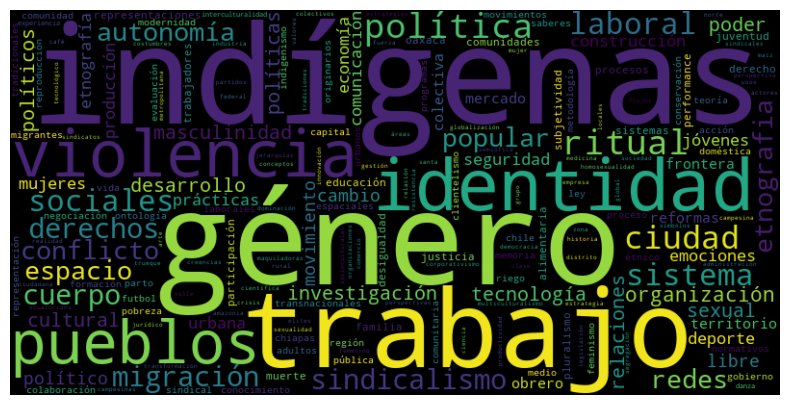

In [115]:
todas_las_palabras_clave = tabla["PalabrasClave"].str.lower().str.cat(sep=', ')

# Eliminar signos de puntuación
todas_las_palabras_clave = todas_las_palabras_clave.translate(str.maketrans('', '', string.punctuation))

# Dividir las palabras clave en palabras individuales
lista_palabras_clave = todas_las_palabras_clave.split()

# Filtrar las palabras clave eliminando las stopwords
lista_palabras_clave = [palabra for palabra in lista_palabras_clave if palabra not in stopwords]

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(lista_palabras_clave)

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.show()

In [135]:
todas_las_palabras_clave = tabla["PalabrasClave"].str.lower().str.cat(sep=', ')

# Dividir las palabras clave en palabras individuales
lista_palabras_clave = todas_las_palabras_clave.split(', ')

lista_palabras_clave = [palabra for palabra in lista_palabras_clave if palabra not in stopwords]

# Contar la frecuencia de cada palabra
frecuencia_palabras = Counter(lista_palabras_clave)

# Obtener las palabras más comunes
palabras_mas_comunes = frecuencia_palabras.most_common(10)  # Cambiar el número para más o menos palabras

# Mostrar las palabras más comunes
print("Palabras clave más comunes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"{palabra}: {frecuencia}")

Palabras clave más comunes:
género: 14
identidad: 11
sindicalismo: 7
pueblos indígenas: 6
masculinidad: 5
autonomía: 5
cuerpo: 5
trabajo: 4
deporte: 4
etnografia: 4
